In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft

%matplotlib inline

*I am aware of and understand the collaboration and use of outside resource policy for this assignment, and affirm I have followed this policy in the completion of this assignment. I am aware of the course and campus policies on Academic Integrity and am aware of the consequences if this policy is not adhered to.*

# Homework 4

## Question 2 - Superluminal Motion

### Part B 

Determine the maximum value of $v_{tran}$ and corresponding "critical" angle $\theta_c$ for a given value of v and show that for $\gamma >> 1$ this apparent velocity can exceed the speed of light.

$$ \frac{v_{tran}}{c} = \frac{(v/c) sin\theta}{1 - (v/c)cos\theta} $$

In [2]:
#Define a function to find the apparent beta for the values of v_tran/c for 0 < theta < 2pi

def beta_app(beta, theta):
    #Make an array of zeros to store values for the transverse velocity over c in
    y = np.zeros(len(theta))
    #Loop through all angles to set each value of the transverse velocity over c
    for i in range(len(theta)):
        y[i] = (beta * np.sin(theta[i]))/(1 - (beta * np.cos(theta[i])))
    return y

In [3]:
#variables to hold the value of 2 pi and pi
double_pi = 2 * np.pi
pi = np.pi

#make an array of angles from 0 to pi that we will loop through to find the transverse velocity at each angle
#Each step is 0.01 radians
theta = np.arange(0, pi, 0.01)

#Transverse velocity over c for different values of beta.
#Each line calls the beta_app function for a different value of beta
y_b098 = beta_app(0.98, theta)
y_b08 = beta_app(0.8, theta)
y_b0707 = beta_app(0.707, theta)
y_b05 = beta_app(0.5, theta)

#An array of 1s to make a dashed line at y = 1
b1 = np.full(len(theta), 1)

Text(0.5, 1.0, 'Transverse Velocity Over Speed of Light for Theta 0 to $\\pi$')

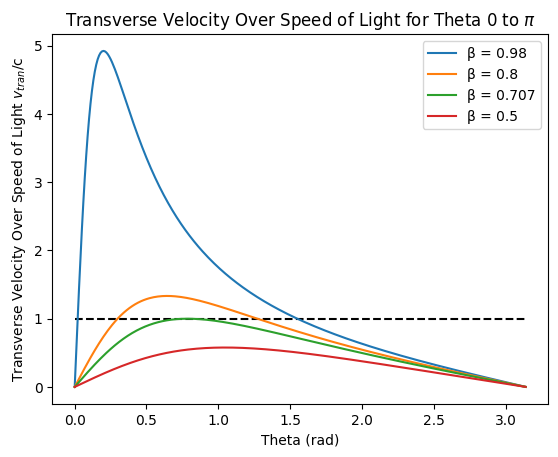

In [4]:
#Plots of the transverse velocity over c for different values of beta

#Plots a dashed line at y=1 to show velocities above which will appear to go faster than c
plt.plot(theta, b1, '--', color='black')

#Plots for v_trans/c for different values of beta
plt.plot(theta, y_b098, label='β = 0.98')
plt.plot(theta, y_b08, label='β = 0.8')
plt.plot(theta, y_b0707, label='β = 0.707')
plt.plot(theta, y_b05, label='β = 0.5')

#Sets legend in the upper right hand corner of the plot
plt.legend(loc = "upper right")

#Labels for the x and y axes
plt.xlabel("Theta (rad)")
plt.ylabel("Transverse Velocity Over Speed of Light $v_{tran}$/c")

#Plot title
plt.title("Transverse Velocity Over Speed of Light for Theta 0 to $\pi$")

#Line below can be uncommented to save the plot to where the code is saved
#plt.savefig('HW4_2B.jpg')

In [5]:
#Finds the index for which the transverse velocity / c is the highest. This will be the max velocity
np.argmax(y_b0707)

79

In [6]:
#Max transverse velocity/c
y_b0707[79]

0.9996783355297448

In [7]:
#Angle in radians where velocity is at it's max
theta[79]

0.79

## Question 3 - Graphing Relativistic Beaming

The angular power distribution for parallel acceleration

$$ \frac{dP_{||}}{d\Omega'} = \frac{q^2 a_{||}^2}{4 \pi c^3} \frac{sin^2 \theta}{\gamma^2 (1 - (v/c)cos\theta)^2} $$

In [8]:
#function for the angular power distribtuion for parallel acceleration from the equation above
#takes in a value of gamma, the constant A, and angles from 0 to 2pi radians
def power_parallel(gamma, A, theta_3):
    #Sets the speed of light at 3e8 m/s
    c = 3e8 #m/s
    #Finds the velocity in terms of c and gamma
    v = c * np.sqrt(1 - (1/(gamma**2)))
    #Arrays of zeros to eventually return when the function is called
    power = np.zeros(len(theta_3))
    x = np.zeros(len(theta_3))
    z = np.zeros(len(theta_3))
    #loops through all the values of theta from 0 to 2 pi
    for j in range(len(theta_3)):
        #Computes the power using the equation above
        power[j] = (A * (((np.sin(theta_3[j]))**2)/(gamma**2 * (1 - (v/c) * np.cos(theta_3[j]))**2)))
        #Translates the angle and magnitude(power) from spherical coordinates back to cartesian coordinates for x and z
        x[j] = power[j] * np.sin(theta_3[j])
        z[j] = power[j] * np.cos(theta_3[j])
    #returns three arrays, the magnitude(power), the x position and the z position.
    return power, x, z

The angular power distribution for perpendicular acceleration

$$ \frac{dP_{\perp}}{d\Omega'} = \frac{q^2 a_{\perp}^2}{4 \pi c^3} \frac{1}{(1 - (v/c)cos\theta)^4} \left[ 1 - \frac{sin^2\theta cos^2 \phi}{\gamma^2 (1 - (v/c)cos\theta)^2} \right]  $$

In [9]:
#function for the angular power distribtuion for perpendicular acceleration from the equation above
#takes in a value of gamma, the constant A, and angles from 0 to 2pi radians
def power_perpendicular(gamma, A, theta_3):
    #Sets the speed of light at 3e8 m/s
    c = 3e8 #m/s
    #Finds the velocity in terms of c and gamma
    v = c * np.sqrt(1 - (1/(gamma**2)))
    #Arrays of zeros to eventually return when the function is called
    power = np.zeros(len(theta_3))
    x = np.zeros(len(theta_3))
    z = np.zeros(len(theta_3))
    #loops through all the values of theta from 0 to 2 pi
    for k in range(len(theta_3)):
        #Computes the power using the equation above
        power[k] = (A * (1/(1 - ((v/c) * np.cos(theta_3[k])))**4) * (1 - (((np.sin(theta_3[k]))**2 * (np.cos(0))**2)/(gamma**2 * (1 - ((v/c) * np.cos(theta_3[k])))**2))))
        #Translates the angle and magnitude(power) from spherical coordinates back to cartesian coordinates for x and z
        x[k] = power[k] * np.sin(theta_3[k])
        z[k] = power[k] * np.cos(theta_3[k])
    #returns three arrays, the magnitude(power), the x position and the z position.
    return power, x, z

In [10]:
#Variable to hold the value of two pi
tau = 2 * np.pi
#Array of angles in radiants from 0 to 2pi plus one extra step to complete the cycle
theta_3 = np.arange(0, tau+0.0001, 0.0001)

#speed of light in m/s
c = 3e8
#Sets the charge at 1
q = 1
#Value of acceleration
a = 5e5

#Constant A from the homework
A = (q**2 * a**2) / (4 * np.pi * c**3)



In [11]:
#Calling the parallel and perpendicular power equations

#Calls parallel power equation and sets the returned values to three arrays (magnitude, x, z)
g5_ll_p, g5_ll_x, g5_ll_z  = power_parallel(5, A, theta_3)
g10_ll_p, g10_ll_x, g10_ll_z = power_parallel(10, A, theta_3)
g100_ll_p, g100_ll_x, g100_ll_z = power_parallel(100, A, theta_3)

#Calls perpendicular power equation and sets the returned values to three arrays (magnitude, x, z)
g5_perp_p, g5_perp_x, g5_perp_z  = power_perpendicular(5, A, theta_3)
g10_perp_p, g10_perp_x, g10_perp_z = power_perpendicular(10, A, theta_3)
g100_perp_p, g100_perp_x, g100_perp_z = power_perpendicular(100, A, theta_3)

#Calls parallel power equation and sets the returned values to three arrays (magnitude, x, z)
#I tried out a few different values of gamma lower than five to see how lower values would change the plots
g12_ll_p, g12_ll_x, g12_ll_z  = power_parallel(1.2, A, theta_3)
g1_ll_p, g1_ll_x, g1_ll_z  = power_parallel(1.25, A, theta_3)
g2_ll_p, g2_ll_x, g2_ll_z = power_parallel(1.5, A, theta_3)
g3_ll_p, g3_ll_x, g3_ll_z = power_parallel(1.75, A, theta_3)

#Calls perpendicular power equation and sets the returned values to three arrays (magnitude, x, z)
#These are the values of gamma I use for figure 7 in the homework.
#I realized that I couldn't plot the perpendicular acceleration plots in the same graph without the gamm = 5 and 10
#plots being too small to see. So I made a separate plot to see this relation.
g12_perp_p, g12_perp_x, g12_perp_z  = power_perpendicular(1.2, A, theta_3)
g1_perp_p, g1_perp_x, g1_perp_z  = power_perpendicular(1.3, A, theta_3)
g14_perp_p, g14_perp_x, g14_perp_z  = power_perpendicular(1.4, A, theta_3)
g2_perp_p, g2_perp_x, g2_perp_z = power_perpendicular(1.5, A, theta_3)
g16_perp_p, g16_perp_x, g16_perp_z  = power_perpendicular(1.6, A, theta_3)
g3_perp_p, g3_perp_x, g3_perp_z = power_perpendicular(1.7, A, theta_3)


Text(0.5, 1.0, 'Angular Distributed Power of Radiating Dipole - Parallel Acceleartion')

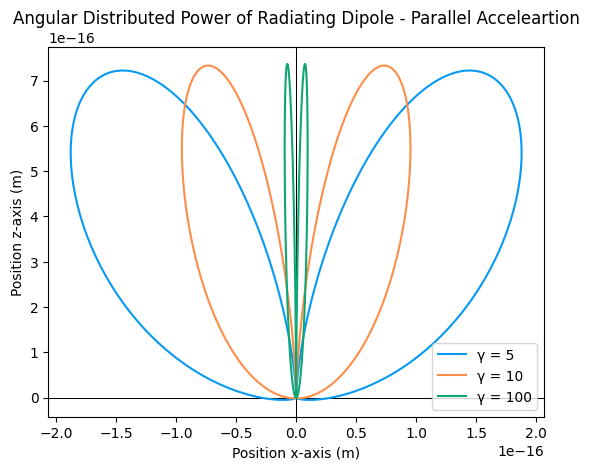

In [12]:
#Plot of the parallel acceleration for all gammas

#Plots the x and y axis for the graph. Slightly thinner line so it doesn't stick out too much
plt.axvline(x = 0, color='black', linewidth = 0.75)
plt.axhline(y = 0, color = 'black', linewidth = 0.75)
#plots for gamma = 5, 10, 100
plt.plot(g5_ll_x, g5_ll_z, label='γ = 5', color='xkcd:azure')
plt.plot(g10_ll_x, g10_ll_z, label='γ = 10', color='xkcd:orangeish')
plt.plot(g100_ll_x, g100_ll_z, label='γ = 100', color='xkcd:bluish green')
#Legend for the plot in the lower right hand corner
plt.legend(loc = "lower right")
#Labels for the x and y axes
plt.xlabel("Position x-axis (m)")
plt.ylabel("Position z-axis (m)")
#Plot title
plt.title("Angular Distributed Power of Radiating Dipole - Parallel Acceleartion")
#Uncomment line below to save plot to where the code file is located
#plt.savefig('HW4_3_parallel.jpg')

Text(0.5, 1.0, 'Angular Distributed Power of Radiating Dipole - Perpendicular Acceleartion')

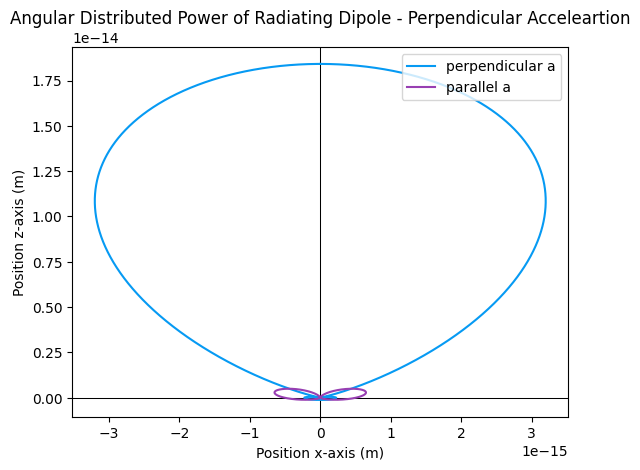

In [13]:
#Plot of the parallel and perpendicular acceleration for gamma = 1.2

#Plots the x and y axis for the graph. Slightly thinner line so it doesn't stick out too much
plt.axvline(x = 0, color='black', linewidth = 0.75)
plt.axhline(y = 0, color = 'black', linewidth = 0.75)
#plots for gamma = 1.2 for perpendicular and parallel acceleration
plt.plot(g12_perp_x, g12_perp_z, label='perpendicular a', color='xkcd:azure')
plt.plot(g12_ll_x, g12_ll_z, label='parallel a', color='xkcd:purply')
#Legend for the plot in the upper right hand corner
plt.legend(loc = "upper right")
#Labels for the x and y axes
plt.xlabel("Position x-axis (m)")
plt.ylabel("Position z-axis (m)")
#Plot title
plt.title("Angular Distributed Power of Radiating Dipole - Perpendicular Acceleartion")
#Uncomment line below to save plot to where the code file is located
#plt.savefig('HW4_3_perp_parallel.jpg')

Text(0.5, 1.0, 'Angular Distributed Power of Radiating Dipole - Perpendicular Acceleartion')

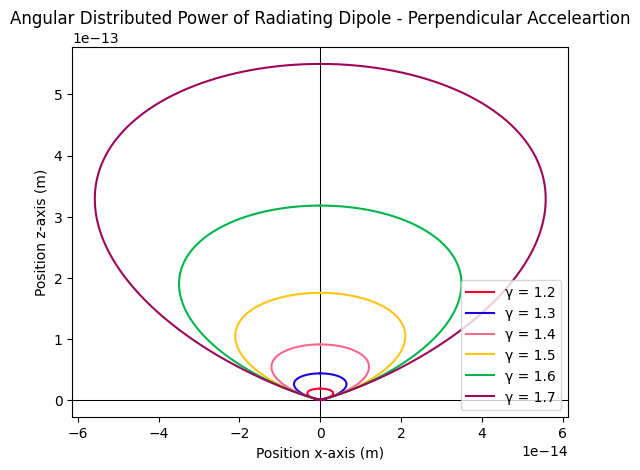

In [14]:
#Plot of the perpendicular acceleration for lower values of gamma

#Plots the x and y axis for the graph. Slightly thinner line so it doesn't stick out too much
plt.axvline(x = 0, color='black', linewidth = 0.75)
plt.axhline(y = 0, color = 'black', linewidth = 0.75)
#plots for gamma = 1.2, 1.3, 1.4, 1.5, 1.6, and 1.7 for perpendicular acceleration
plt.plot(g12_perp_x, g12_perp_z, label='γ = 1.2', color='xkcd:cherry red')
plt.plot(g1_perp_x, g1_perp_z, label='γ = 1.3', color='xkcd:ultramarine blue')
plt.plot(g14_perp_x, g14_perp_z, label='γ = 1.4', color='xkcd:rosy pink')
plt.plot(g2_perp_x, g2_perp_z, label='γ = 1.5', color='xkcd:sunflower')
plt.plot(g16_perp_x, g16_perp_z, label='γ = 1.6', color='xkcd:shamrock')
plt.plot(g3_perp_x, g3_perp_z, label='γ = 1.7', color='xkcd:dark fuchsia')
#Legend for the plot in the lower right hand corner
plt.legend(loc = "lower right")
#Labels for the x and y axes
plt.xlabel("Position x-axis (m)")
plt.ylabel("Position z-axis (m)")
#Plot title
plt.title("Angular Distributed Power of Radiating Dipole - Perpendicular Acceleartion")
#Uncomment line below to save plot to where the code file is located
#plt.savefig('HW4_3_perpendicular_low_gammas.jpg')

Text(0.5, 1.0, 'Angular Distributed Power of Radiating Dipole - Perpendicular Acceleartion')

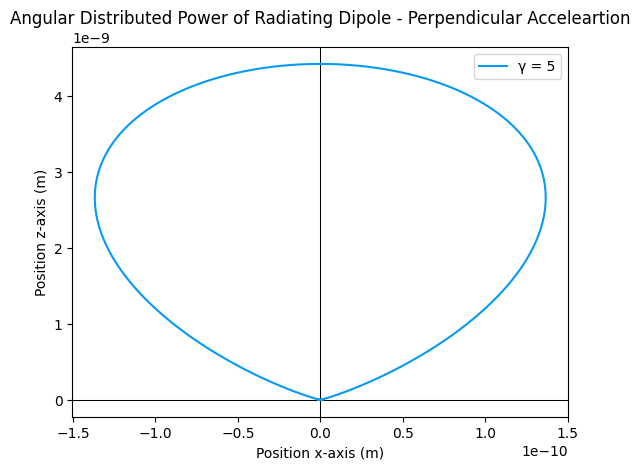

In [15]:
#Plot of the perpendicular acceleration for gamma = 5

#Plots the x and y axis for the graph. Slightly thinner line so it doesn't stick out too much
plt.axvline(x = 0, color='black', linewidth = 0.75)
plt.axhline(y = 0, color = 'black', linewidth = 0.75)
#plots for gamma = 5
plt.plot(g5_perp_x, g5_perp_z, label='γ = 5', color='xkcd:azure')
#Legend for the plot in the upper right hand corner
plt.legend(loc = "upper right")
#Labels for the x and y axes
plt.xlabel("Position x-axis (m)")
plt.ylabel("Position z-axis (m)")
#Plot title
plt.title("Angular Distributed Power of Radiating Dipole - Perpendicular Acceleartion")
#Uncomment line below to save plot to where the code file is located
#plt.savefig('HW4_3_perp_5.jpg')

Text(0.5, 1.0, 'Angular Distributed Power of Radiating Dipole - Perpendicular Acceleartion')

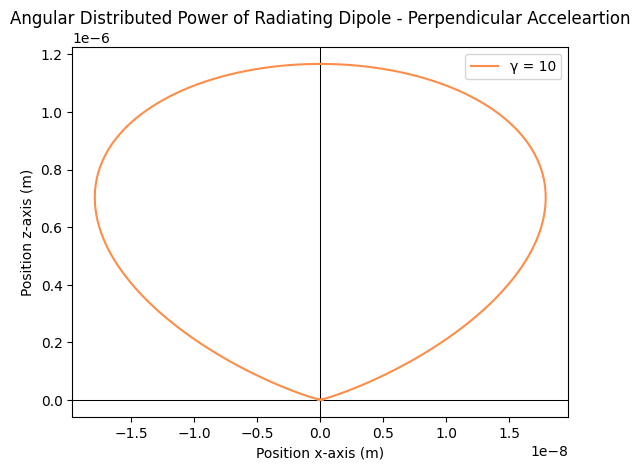

In [16]:
#Plot of the perpendicular acceleration for gamma = 10

#Plots the x and y axis for the graph. Slightly thinner line so it doesn't stick out too much
plt.axvline(x = 0, color='black', linewidth = 0.75)
plt.axhline(y = 0, color = 'black', linewidth = 0.75)
#plots for gamma = 10
plt.plot(g10_perp_x, g10_perp_z, label='γ = 10', color='xkcd:orangeish')
#Legend for the plot in the upper right hand corner
plt.legend(loc = "upper right")
#Labels for the x and y axes
plt.xlabel("Position x-axis (m)")
plt.ylabel("Position z-axis (m)")
#Plot title
plt.title("Angular Distributed Power of Radiating Dipole - Perpendicular Acceleartion")
#Uncomment line below to save plot to where the code file is located
#plt.savefig('HW4_3_perp_10.jpg')

Text(0.5, 1.0, 'Angular Distributed Power of Radiating Dipole - Perpendicular Acceleartion')

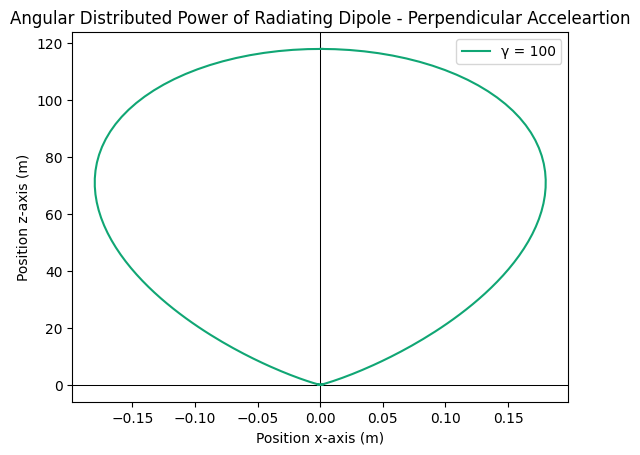

In [17]:
#Plot of the perpendicular acceleration for gamma = 100

#Plots the x and y axis for the graph. Slightly thinner line so it doesn't stick out too much
plt.axvline(x = 0, color='black', linewidth = 0.75)
plt.axhline(y = 0, color = 'black', linewidth = 0.75)
#plots for gamma = 100
plt.plot(g100_perp_x, g100_perp_z, label='γ = 100', color='xkcd:bluish green')
#Legend for the plot in the upper right hand corner
plt.legend(loc = "upper right")
#Labels for the x and y axes
plt.xlabel("Position x-axis (m)")
plt.ylabel("Position z-axis (m)")
#Plot title
plt.title("Angular Distributed Power of Radiating Dipole - Perpendicular Acceleartion")
#Uncomment line below to save plot to where the code file is located
#plt.savefig('HW4_3_perp_100.jpg')